In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 1279.5, 799.5, -0.5)

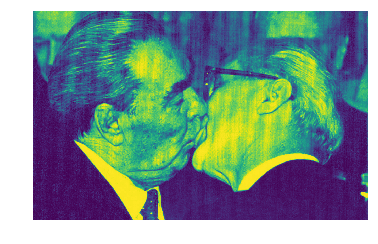

In [2]:
face = mpimg.imread('/home/oleg/Programming/Python Code/kiss.png')
plt.imshow(face)
plt.axis('off')

In [3]:
def principal_components(A, n_components = 50):
    # A is a 2D matrix representing grayscale pixel values of an image
    
    # normalizing the matrix by subtracting the mean (along columns)
    A_norm = (A-np.mean(A.T,axis=1)).T
    
    # computing eigenvalues and eigenvectors of covariance matrix
    [e_vals,e_vecs] = np.linalg.eig(np.cov(A_norm))
    
    # sorting the eigenvalues and eigenvectors in descending order
    idx = np.argsort(-e_vals) 
    e_vals = e_vals[idx]
    e_vecs = e_vecs[:,idx]
    
    # taking only the top n_components
    e_vals = e_vals[:n_components]
    e_vecs = e_vecs[:,range(n_components)].real

    # projection of the data in the new space
    proj = np.dot(e_vecs.T,A_norm)

    return e_vecs,proj,e_vals

Text(0.5,1,'Original')

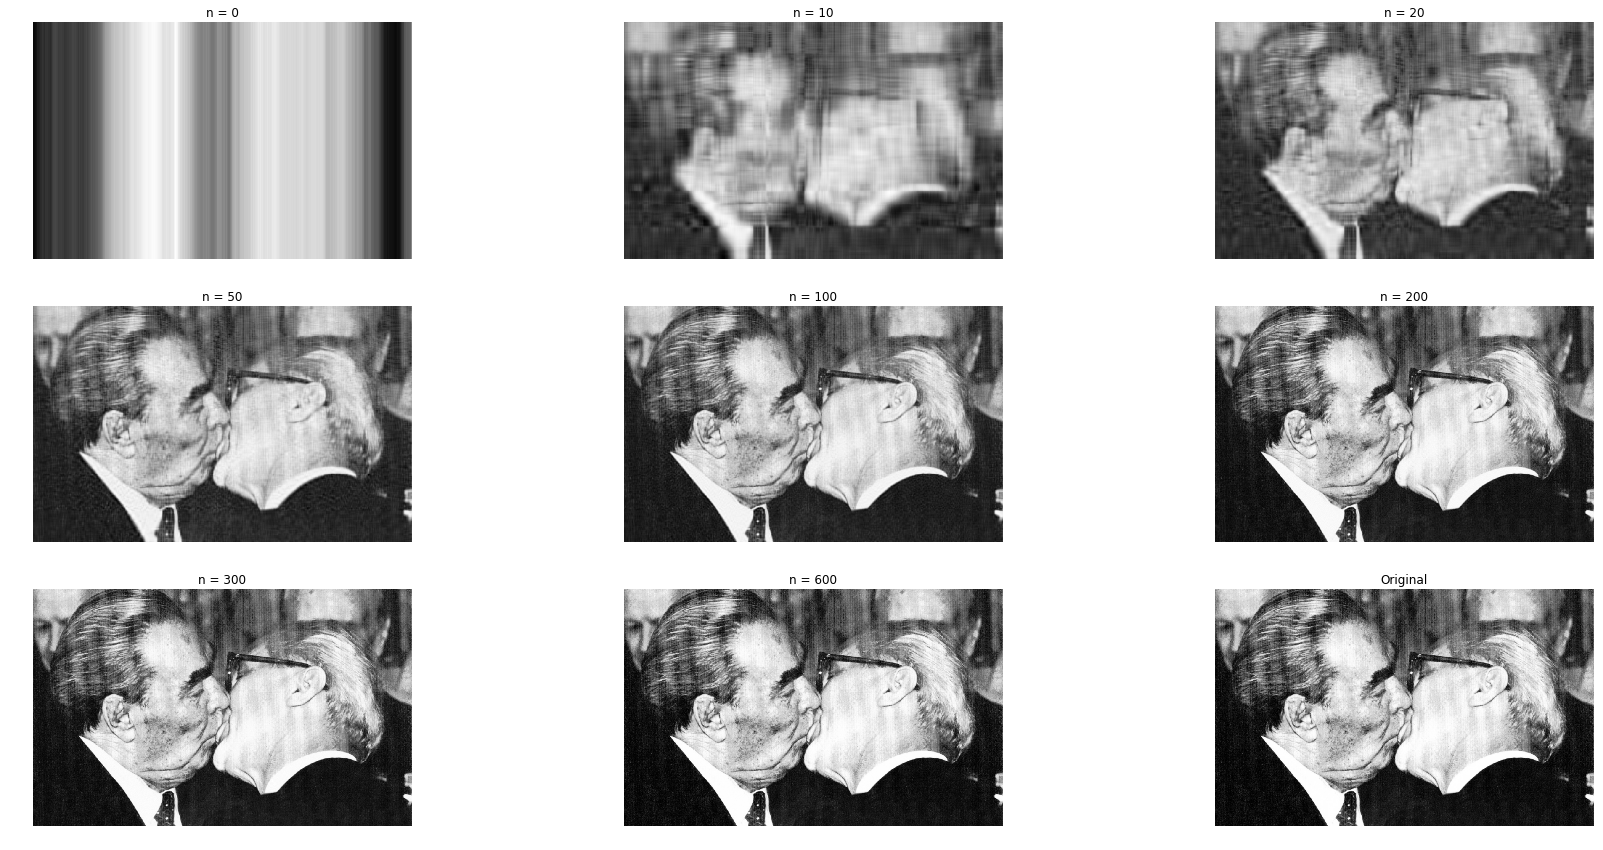

In [6]:
X = face

# if RGB, convert to grayscale
if len(X.shape) > 2:
    X = np.mean(X,2)

# number of columns
n_components = np.size(X,axis=1)

dist = []

max_components = 300
step = 30
components = [0, 10, 20, 50, 100, 200, 300, 600]

i = 1
n_columns = 3
n_images = max_components/step/n_columns + 1

fig = plt.figure(figsize=(30, 20))

for n in components:
    e_vecs,proj,e_vals = principal_components(X, n)
    
    # Reconstructing original image from the projection
    Xr = np.dot(e_vecs,proj).T + np.mean(X,axis=0)
    
    # Distance between original and reconstruction
    dist.append(np.linalg.norm(X-Xr))
    
    fig.add_subplot(n_images, n_columns, i)
    plt.imshow(Xr, cmap='Greys_r')
    plt.axis('off')
    plt.title("n = %d" % n)
    
    i += 1

fig.add_subplot(n_images, n_columns, i)
plt.imshow(X, cmap='Greys_r')
plt.axis('off')
plt.title("Original")